# PizzaHut Regression

#### Importing required modules

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from pandas.tools.plotting import scatter_matrix as scatmat
import math
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot    
import plotly.graph_objs as go

/home/user/Stackroute/p3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Extracting the data from csv files

In [2]:
data_class = pd.read_csv("Ex06_Pizzademand_Classification.csv")
data_reg = pd.read_csv("Ex06_Pizzademand_Regreesion.csv")

In [3]:
data_reg.dropna(how = 'any', inplace = True)

#### Plotting scatmat matrix

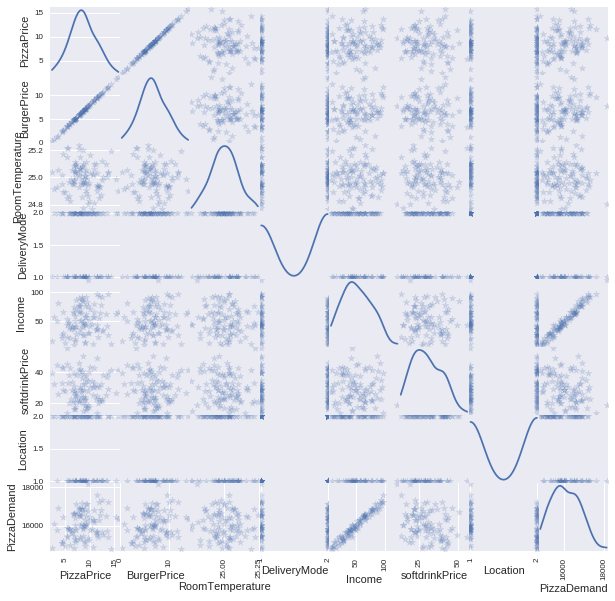

In [4]:
scatmat(data_reg,alpha=0.2, figsize=(10, 10), diagonal='kde', grid=True, marker='*')
plt.show()

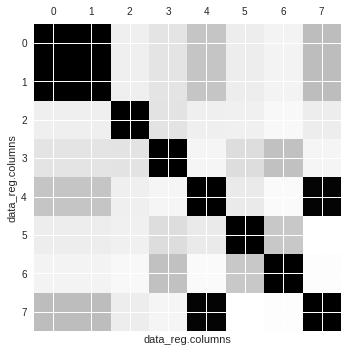

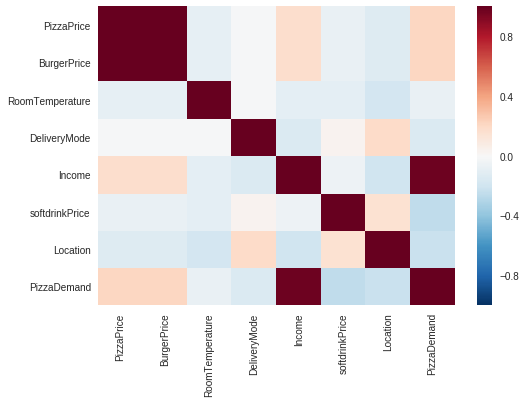

In [5]:
plt.matshow(data_reg.corr())
plt.xlabel('data_reg.columns')
plt.ylabel('data_reg.columns')
plt.xticklabels = data_reg.columns.values
plt.yticklabels = data_reg.columns.values
plt.show()

corr = data_reg.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [6]:
data = data_reg.copy()
#data = pd.DataFrame(preprocessing.normalize(data, norm='l2'))

data_train = data.iloc[:70,:]
data_test = data.iloc[71:,:]
data.head()

,PizzaPrice,BurgerPrice,RoomTemperature,DeliveryMode,Income,softdrinkPrice,Location,PizzaDemand
0,11.716233,9.716233,24.937096,2,21.772162,20.251733,2,15383.265370
1,8.695689,6.695689,24.772566,1,43.172762,14.877143,1,16036.037969
2,7.056686,5.056686,25.033494,2,18.661751,16.041785,1,15317.391311
3,12.499111,10.499111,24.978631,1,92.107600,22.401484,1,17327.343321
4,8.208723,6.208723,24.996846,2,51.482776,27.352832,1,16077.301577


### 1. data with all features

In [7]:
data_xtrain = data_train.iloc[:,0:7]
data_ytrain = data_train.iloc[:,-1]
data_xtest = data_test.iloc[:,0:7]
data_ytest = data_test.iloc[:,-1]
data_xtrain.head()

,PizzaPrice,BurgerPrice,RoomTemperature,DeliveryMode,Income,softdrinkPrice,Location
0,11.716233,9.716233,24.937096,2,21.772162,20.251733,2
1,8.695689,6.695689,24.772566,1,43.172762,14.877143,1
2,7.056686,5.056686,25.033494,2,18.661751,16.041785,1
3,12.499111,10.499111,24.978631,1,92.107600,22.401484,1
4,8.208723,6.208723,24.996846,2,51.482776,27.352832,1


In [8]:
reg = lm.LinearRegression()
print(reg.fit(data_xtrain, data_ytrain))
print("coefficients = ", reg.coef_, "\nintercept = ",reg.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
coefficients =  [  4.50071212e+00   4.50071212e+00   4.81566708e-04   2.44445005e-02
   2.80004015e+01  -1.50023493e+01   2.24026053e-02] 
intercept =  14980.9463686


Score =  0.999999974485
Mean Sq. Error:  0.0148425128458


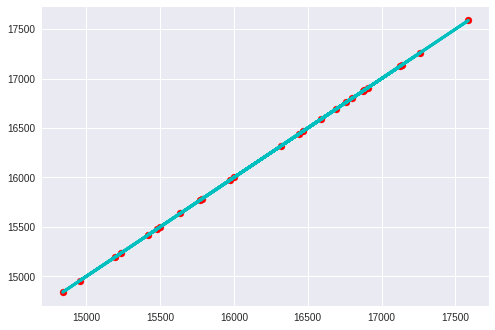

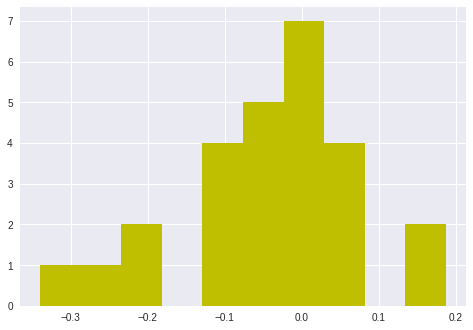

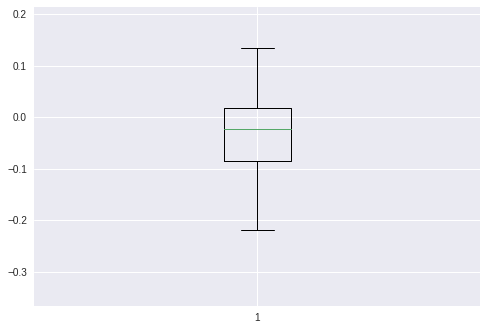

In [9]:
print("Score = ", reg.score(data_xtest, data_ytest))
print("Mean Sq. Error: ",np.mean((reg.predict(data_xtest)- data_ytest)**2) )

plt.scatter(reg.predict(data_xtest),data_ytest, color='r')
plt.plot(reg.predict(data_xtest),data_ytest, color='c',linewidth=3)
plt.show()

plt.hist(reg.predict(data_xtest)- data_ytest, color='y')
plt.show()
plt.boxplot(np.array(reg.predict(data_xtest)- data_ytest),0)
plt.show()


In [10]:
result = sm.ols(formula = "PizzaDemand ~ PizzaPrice + BurgerPrice + RoomTemperature + DeliveryMode + Income + softdrinkPrice + Location", data = data ).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            PizzaDemand   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.745e+08
Date:                Fri, 31 Mar 2017   Prob (F-statistic):               0.00
Time:                        17:44:49   Log-Likelihood:                 86.502
No. Observations:                  97   AIC:                            -159.0
Df Residuals:                      90   BIC:                            -141.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4993.6523      0.881   56

### 2. Dropping RoomTemperature

In [ ]:
data_xtrain = data_train.iloc[:,[0,1,3,4,5,6]]
data_ytrain = data_train.iloc[:,-1]
data_xtest = data_test.iloc[:,[0,1,3,4,5,6]]
data_ytest = data_test.iloc[:,-1]
data_xtrain.columns

In [ ]:
regr2 = lm.LinearRegression()
print(regr2.fit(data_xtrain, data_ytrain))
print(regr2.coef_,"....", regr2.intercept_)

In [ ]:
print("Score = ", regr2.score(data_xtest, data_ytest))
print("Mean Sq. Error: ",np.mean((regr2.predict(data_xtest)- data_ytest)**2) )
val_resid = regr2.predict(data_xtest)- data_ytest

In [ ]:
plt.scatter(regr2.predict(data_xtest),data_ytest, color='r')
plt.plot(regr2.predict(data_xtest),data_ytest, color='c',linewidth=3)
plt.show()

plt.hist(regr2.predict(data_xtest)- data_ytest)
plt.show()
plt.boxplot(np.array(regr2.predict(data_xtest)- data_ytest),0)
plt.show()


In [ ]:
result2 = sm.ols(formula = "PizzaDemand ~ PizzaPrice + BurgerPrice  + Income + softdrinkPrice  ", data = data ).fit()
print(result2.summary())

### 3. dropping delivery mode

In [ ]:
data_xtrain = data_train.iloc[:,[0,1,2,4,5,6]]
data_ytrain = data_train.iloc[:,-1]
data_xtest = data_test.iloc[:,[0,1,2,4,5,6]]
data_ytest = data_test.iloc[:,-1]
data_xtrain.columns

In [ ]:
regr3 = lm.LinearRegression()
print(regr3.fit(data_xtrain, data_ytrain))
print(regr3.coef_,"....", regr3.intercept_)

In [ ]:
print("Score = ", regr3.score(data_xtest, data_ytest))
print("Mean Sq. Error: ",np.mean((regr3.predict(data_xtest)- data_ytest)**2) )
print("RMSE: ", math.sqrt(np.mean((regr3.predict(data_xtest)- data_ytest)**2)))

In [ ]:
plt.scatter(regr3.predict(data_xtest),data_ytest, color='r')
plt.plot(regr3.predict(data_xtest),data_ytest, color='c',linewidth=3)
plt.show()

plt.hist(regr3.predict(data_xtest)- data_ytest, color='b')
plt.show()
plt.boxplot(np.array(regr3.predict(data_xtest)- data_ytest),0)
plt.show()


#### 4. dropping delivery mode , Room Temperature & location 

In [ ]:
data_xtrain = data_train.iloc[:,[0,1,4,5]]
data_ytrain = data_train.iloc[:,-1]
data_xtest = data_test.iloc[:,[0,1,4,5]]
data_ytest = data_test.iloc[:,-1]
data_xtrain.columns

In [ ]:
regr4 = lm.LinearRegression()
print(regr4.fit(data_xtrain, data_ytrain))
print(regr4.coef_,"....", regr4.intercept_)

In [ ]:
print("Score = ", regr4.score(data_xtest, data_ytest))
print("Mean Sq. Error: ",np.mean((regr4.predict(data_xtest)- data_ytest)**2) )
print("RMSE: ", math.sqrt(np.mean((regr4.predict(data_xtest)- data_ytest)**2)))

In [ ]:
plt.scatter(regr4.predict(data_xtest), data_ytest, color='r')
plt.plot(regr4.predict(data_xtest), data_ytest, color='c',linewidth=3)
plt.show()
plt.hist(regr4.predict(data_xtest)- data_ytest, color='r',bins=5)
plt.show()
plt.boxplot(np.array(regr4.predict(data_xtest)- data_ytest),0)
plt.show()

In [ ]:
result3 = sm.ols(formula = "PizzaDemand ~ PizzaPrice  + BurgerPrice + Income + softdrinkPrice  ", data = data ).fit()
print(result3.summary())

### Keeping pizza price, burger price, income

In [ ]:
data_xtrain = data_train.iloc[:,[1,4,5]]
data_ytrain = data_train.iloc[:,-1]
data_xtest = data_test.iloc[:,[1,4,5]]
data_ytest = data_test.iloc[:,-1]
data_xtrain.columns

In [ ]:
regr5 = lm.LinearRegression()
print(regr5.fit(data_xtrain, data_ytrain))
print(regr5.coef_,"....", regr5.intercept_)
print("Score = ", regr5.score(data_xtest, data_ytest))
print("Mean Sq. Error: ",np.mean((regr5.predict(data_xtest)- data_ytest)**2) )
print("RMSE: ", math.sqrt(np.mean((regr5.predict(data_xtest)- data_ytest)**2)))


plt.scatter(regr5.predict(data_xtest),data_ytest, color='r')
plt.plot(regr5.predict(data_xtest),data_ytest, color='c')
plt.show()

plt.hist(regr5.predict(data_xtest)- data_ytest, color='m')
plt.show()

plt.boxplot(np.array(regr5.predict(data_xtest)- data_ytest),0)
plt.show()

Cross Validation

In [ ]:
import statsmodels.stats.diagnostic as sms

name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(result3.resid, result3.model.exog)
list(zip(name,test))

Alpha Array

In [12]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([  5.00000000e+09,   3.78231664e+09,   2.86118383e+09,
         2.16438064e+09,   1.63727458e+09,   1.23853818e+09,
         9.36908711e+08,   7.08737081e+08,   5.36133611e+08,
         4.05565415e+08,   3.06795364e+08,   2.32079442e+08,
         1.75559587e+08,   1.32804389e+08,   1.00461650e+08,
         7.59955541e+07,   5.74878498e+07,   4.34874501e+07,
         3.28966612e+07,   2.48851178e+07,   1.88246790e+07,
         1.42401793e+07,   1.07721735e+07,   8.14875417e+06,
         6.16423370e+06,   4.66301673e+06,   3.52740116e+06,
         2.66834962e+06,   2.01850863e+06,   1.52692775e+06,
         1.15506485e+06,   8.73764200e+05,   6.60970574e+05,
         5.00000000e+05,   3.78231664e+05,   2.86118383e+05,
         2.16438064e+05,   1.63727458e+05,   1.23853818e+05,
         9.36908711e+04,   7.08737081e+04,   5.36133611e+04,
         4.05565415e+04,   3.06795364e+04,   2.32079442e+04,
         1.75559587e+04,   1.32804389e+04,   1.00461650e+04,
         7.59955541e+03,

Ridge Analysis

In [13]:
ridge = Ridge(normalize=False)
coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(data_xtrain, data_ytrain)
    coefs.append(ridge.coef_)
np.shape(coefs)
coeffs = pd.DataFrame(coefs)
coeffs['Alpha']=pd.DataFrame(alphas)
coeffs.head()


,0,1,2,3,4,5,6,Alpha
0,0.000004,0.000004,-1.249157e-07,-0.000001,0.000225,-0.000019,-0.000001,5.000000e+09
1,0.000005,0.000005,-1.651308e-07,-0.000001,0.000298,-0.000025,-0.000002,3.782317e+09
2,0.000007,0.000007,-2.182924e-07,-0.000002,0.000393,-0.000033,-0.000002,2.861184e+09
3,0.000010,0.000010,-2.885683e-07,-0.000002,0.000520,-0.000044,-0.000003,2.164381e+09
4,0.000013,0.000013,-3.814679e-07,-0.000003,0.000688,-0.000058,-0.000003,1.637275e+09


In [14]:
trace1 = go.Scatter(
    x=coeffs.Alpha,
    y=coeffs[0],
    mode='lines+markers',
    name="Pizza Price",
    hoverinfo='name',
    line=dict(shape='linear')
)
trace2 = go.Scatter(
    x=coeffs.Alpha,
    y=coeffs[1],
    mode='lines+markers',
    name="Burger Price",
    hoverinfo='text+name',
    line=dict(shape='linear')
)
trace3 = go.Scatter(
    x=coeffs.Alpha,
    y=coeffs[2],
    mode='lines+markers',
    name="Room Temperature",
    hoverinfo='name',
    line=dict(shape='linear')
)
trace4 = go.Scatter(
    x=coeffs.Alpha,
    y=coeffs[3],
    mode='lines+markers',
    name="Delivery Mode",
    hoverinfo='name',
    line=dict(shape='linear')
)
trace5 = go.Scatter(
    x=coeffs.Alpha,
    y=coeffs[4],
    mode='lines+markers',
    name="Income",
    hoverinfo='name',
    line=dict(shape='linear')
)
trace6 = go.Scatter(
    x=coeffs.Alpha,
    y=coeffs[5],
    mode='lines+markers',
    name="Soft Drink Price",
    hoverinfo='name',
    line=dict(shape='linear')
)
trace7 = go.Scatter(
    x=coeffs.Alpha,
    y=coeffs[6],
    mode='lines+markers',
    name="Location",
    hoverinfo='name',
    line=dict(shape='linear')
)
data = [trace1, trace2, trace3, trace4, trace5, trace6,trace7]
layout = dict(
    legend=dict(
        y=10,
        font=dict(size=10)
    )
)
fig = dict(data=data, layout=layout)
plot(fig, filename='Pizza')

/home/user/Stackroute/p3/lib/python3.5/site-packages/plotly/offline/offline.py:445: UserWarning:

Your filename `Pizza` didn't end with .html. Adding .html to the end of your file.



'file:///home/user/Stackroute/p3/bin/Pizza.html'

In [ ]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [ ]:
ridge2 = Ridge(alpha=0.081487541731032009, normalize=False)
ridge2.fit(data_xtrain, data_ytrain)
pred2 = ridge2.predict(data_xtest)
print(pd.Series(ridge2.coef_))
print(mean_squared_error(data_ytest, pred2))

In [ ]:
ridgecv = RidgeCV(alphas=alphas, scoring='mean_squared_error', normalize=False)
ridgecv.fit(data_xtrain, data_ytrain)
ridgecv.alpha_

Lasso Analysis

In [ ]:
lasso = Lasso(max_iter=10000, normalize=False)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(data_xtrain), data_ytrain)
    coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [ ]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=False)
lassocv.fit(data_xtrain, data_ytrain)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(data_xtrain, data_ytrain)
mean_squared_error(data_ytest, lasso.predict(data_xtest))

In [ ]:
pd.Series(lasso.coef_)